In [1]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pickle 

In [2]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

## With Log 

In [3]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [4]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[15:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [5]:
y_pred = xgb.predict(x_test)

In [6]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9516500041017242
MSE: 1.3882570195609478
RMSE: 1.1782431920282619


In [7]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['reg:squarederror']
}

In [8]:
xgb_random = RandomizedSearchCV(
    estimator = xgb, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [9]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.193 total time=   0.8s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.271 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.080 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.043 total time=   0.8s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.158 total time=   0.8s
[CV 1/5] END colsample_bytree

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.5, 0.7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [10]:
xgb_random.best_params_

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [11]:
prediction = xgb_random.predict(x_test)

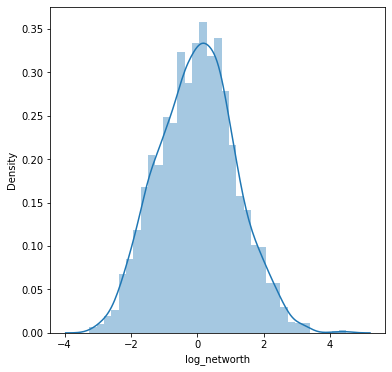

In [12]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.9361076965625305
MSE: 1.3543926176135601
RMSE: 1.1637837503649722


In [14]:
file = open('XGBRegressorLog.pkl', 'wb')
pickle.dump(xgb_random, file)

## Without Log 

In [15]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [16]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[15:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [17]:
y_pred = xgb.predict(x_test)

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 31511631.054937165
MSE: 2606410417946448.0
RMSE: 51053015.7576068


In [19]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['reg:squarederror']
}

In [20]:
xgb_random = RandomizedSearchCV(
    estimator = xgb, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [21]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-2731783392577365.000 total time=   1.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-2751523295639181.500 total time=   1.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-2541479156513725.000 total time=   1.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-2603651598898674.500 total time=   1.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, s

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.5, 0.7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [22]:
xgb_random.best_params_

{'subsample': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5}

In [23]:
prediction = xgb_random.predict(x_test)

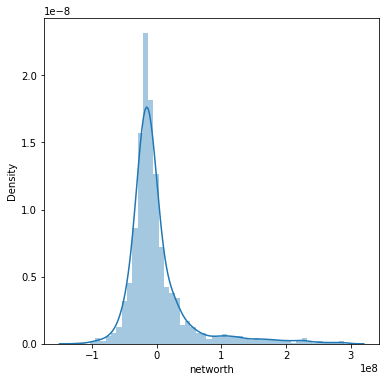

In [24]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 30732146.16427289
MSE: 2508018684440478.0
RMSE: 50080122.648017526


In [26]:
file = open('XGBRegressor.pkl', 'wb')
pickle.dump(xgb_random, file)